# Ecommerce text classification dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
import re

### analisi primaria really simple

In [34]:
df = pd.read_csv(fr"esplorazione_dati.csv", 
    names = ['categoria', 'caratteristiche'])

In [5]:
pd.set_option('display.max_rows', None)
df.head()

,categoria,caratteristiche
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [6]:
df.describe()

,categoria,caratteristiche
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [7]:
df.head()

,categoria,caratteristiche
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [8]:
# quanti prodotti ci sono per categoria?
df.groupby('categoria').count()

,caratteristiche
categoria,
Books,11820
Clothing & Accessories,8670
Electronics,10621
Household,19313


In [9]:
print(pd.Series({"Numero di osservaazioni con valori mancanti: ": len(df) - len(df.dropna()),
                 "Numero di duplicati: ": df.duplicated().sum()}).to_string())

Numero di osservaazioni con valori mancanti:         1
Numero di duplicati:                             22622


In [10]:
df.dropna(inplace = True) # Dropping observations with missing values
df.drop_duplicates(inplace = True) # Dropping duplicate observations
df.reset_index(drop = True, inplace = True) 

In [47]:
df.describe()

,categoria,caratteristiche
count,27802,27802
unique,4,27802
top,Household,Paper Plane Design Framed Wall Hanging Motivat...
freq,10564,1


In [48]:
df['categoria'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [11]:
# quanti prodotti ci sono per categoria?
df.groupby('categoria').count()

,caratteristiche
categoria,
Books,6256
Clothing & Accessories,5674
Electronics,5308
Household,10564


In [13]:
categoria_dizz = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
df.replace({'categoria': categoria_dizz}, inplace = True)

### primi grafici carini

#### Grafici sulle parole più utilizzate

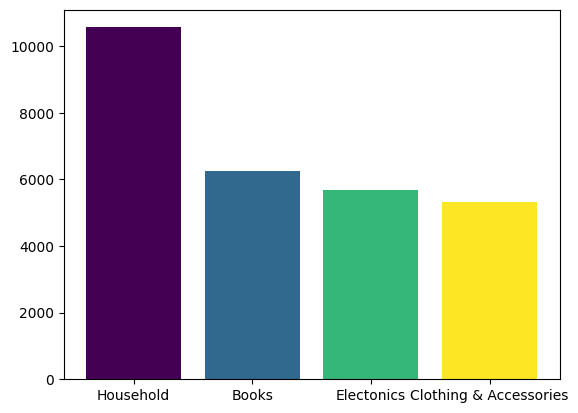

In [14]:
# Crea il grafico a barre
warnings.filterwarnings('ignore')
etichette = ['Household', 'Books', 'Electonics', 'Clothing & Accessories']
valori = df['categoria'].value_counts()
# Crea una mappa di colori (colormap)
colormap = plt.cm.get_cmap('viridis')

# Crea il grafico a barre con colori personalizzati
plt.bar(range(len(valori)), valori, color=colormap(np.linspace(0, 1, len(valori))))

# Imposta le etichette dell'asse x
plt.xticks(range(len(valori)), etichette)

# Mostra il grafico
plt.show()


In [18]:
data_e = df[df['categoria'] == 0] # Electronics
data_h = df[df['categoria'] == 1] # Household
data_b = df[df['categoria'] == 2] # Books
data_c = df[df['categoria'] == 3] # Clothing & Accessories


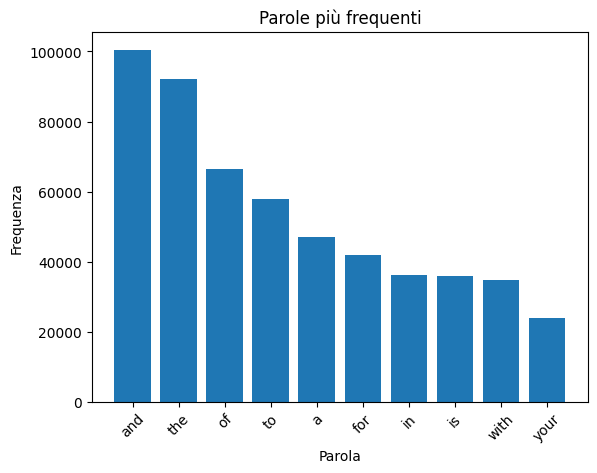

In [19]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
from collections import Counter
column_words = 'caratteristiche'  # Sostituisci 'nome_colonna' con il nome della colonna del DataFrame contenente le stringhe
all_words = ' '.join(df[column_words]).split()
word_counts = Counter(all_words)
top_n = 10  # Sostituisci con il numero desiderato di parole da plottare
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti')
plt.xticks(rotation=45)
plt.show()

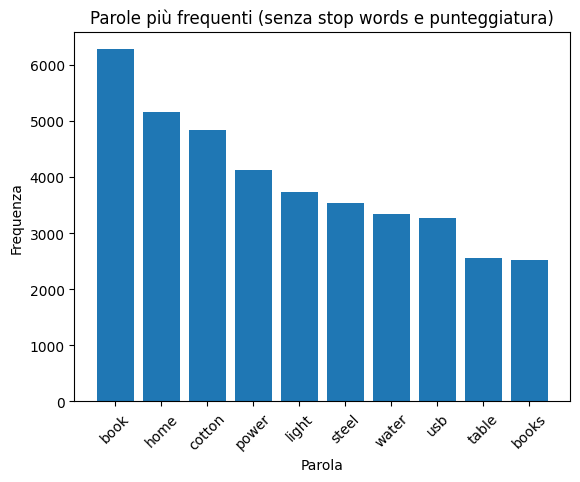

In [29]:
column_words = 'caratteristiche'
all_words = ' '.join(df[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'fabric', 'products', 'stainless', 'years', 'makes', 'fit', 'set', 'white', 'wear', 'style', 'soft', 'look', 'long', 'life', 'design', 'material', 'designed', 'features', 'make', 'comes', 'used', 'author', 'black', 'color', 'high', 'best', 'made', 'one', 'quality', 'easy', 'perfect', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

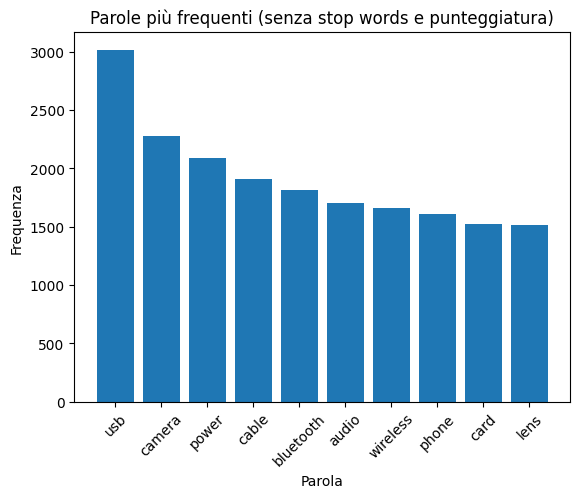

In [30]:
# elettronica

column_words = 'caratteristiche'
all_words = ' '.join(data_e[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'set', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

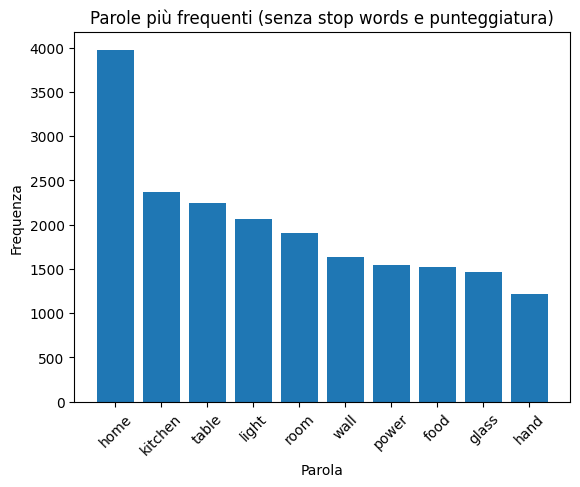

In [31]:
# household

column_words = 'caratteristiche'
all_words = ' '.join(data_h[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'set', 'durable', 'used', 'makes', 'best', 'storage', 'features', 'long', 'air', 'designed', 'clean', 'water', 'steel', 'finish', 'cm', 'products', 'stainless', 'white', 'comes', 'make', 'perfect', 'plastic', 'material', 'quality', 'design', 'color', 'easy', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

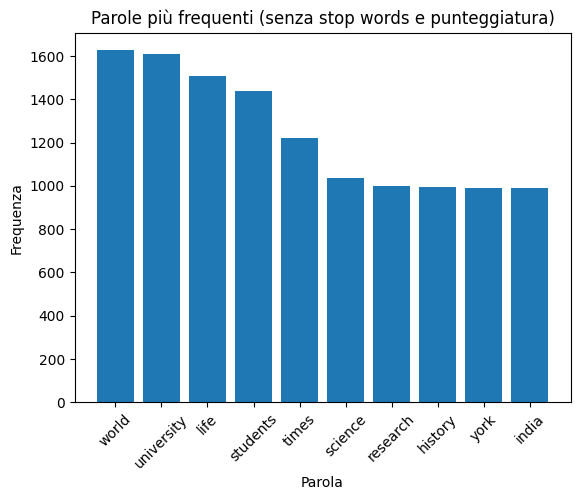

In [32]:
# books

column_words = 'caratteristiche'
all_words = ' '.join(data_b[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'set', 'read', 'work', 'used', 'content', 'book', 'books', 'us', 'years', 'best', 'author', 'word', 'review', 'features', 'long', 'air', 'designed', 'clean', 'water', 'steel', 'finish', 'cm', 'products', 'stainless', 'white', 'comes', 'make', 'perfect', 'plastic', 'material', 'quality', 'design', 'color', 'easy', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

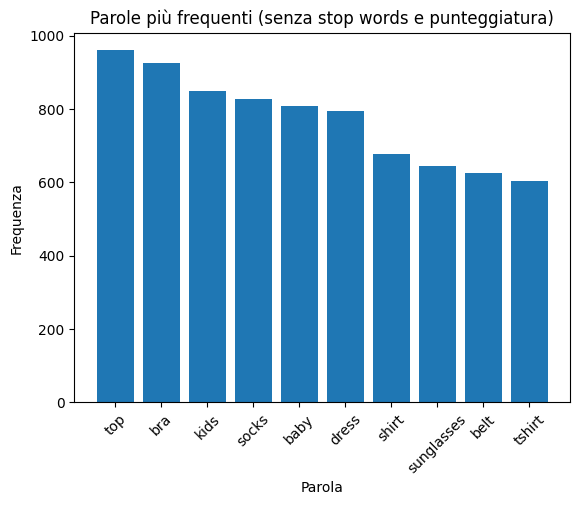

In [33]:
# clothes and accessories

column_words = 'caratteristiche'
all_words = ' '.join(data_c[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'girls', 'look', 'day', 'skin', 'printed', 'full', 'waist', 'fabric', 'brand', 'free', 'length', 'pair', 'boys', 'men', 'pack', 'stylish', 'fashion', 'casual', 'womens', 'women', 'wear', 'comfortable', 'comfort', 'style', 'fit', 'mens', 'soft', 'cotton', 'wears', 'set', 'read', 'work', 'used', 'content', 'book', 'books', 'us', 'years', 'best', 'author', 'word', 'review', 'features', 'long', 'air', 'designed', 'clean', 'water', 'steel', 'finish', 'cm', 'products', 'stainless', 'white', 'comes', 'make', 'perfect', 'plastic', 'material', 'quality', 'design', 'color', 'easy', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()